In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
import psutil
import numpy as np
import xarray as xr
from segysak.segy import segy_loader, get_segy_texthead, segy_header_scan, segy_header_scrape
from segysak import create_seismic_dataset, create3d_dataset, create2d_dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create an empty seismic cube by specifying dimensions as arrays of values.
d1 = create_seismic_dataset(twt=np.arange(1001), d2=5, cdp=np.r_[1, 2, 3], offset=np.r_[100, 200, 351], d5=np.linspace(10, 100, 10))
#d2 = create_seismic_dataset(twt=np.arange(1001), iline=5, cdp=np.r_[1, 2, 3], offset=np.r_[100, 200, 351], d5=np.linspace(10, 100, 10))
d3 = create_seismic_dataset(depth=3*np.arange(1001), iline=5, xline=np.r_[10, 20, 30], offset=np.r_[100, 200, 351])
d4 = create3d_dataset((10, 15, 20), sample_rate=2, first_iline=10, first_xline=12, xline_step=2)
d5 = create2d_dataset((10, 15, 20), sample_rate=2, first_cdp=10, first_offset=5, offset_step=10)

In [5]:
d4

<xarray.Dataset>
Dimensions:  (iline: 10, twt: 20, xline: 15)
Coordinates:
  * iline    (iline) int32 10 11 12 13 14 15 16 17 18 19
  * xline    (xline) int32 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40
  * twt      (twt) int32 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38
Data variables:
    *empty*
Attributes:
    ns:                None
    ds:                2
    text:              SEGY-SAK Create 3D Dataset
    d3_units:          None
    d3_domain:         TWT
    epsg:              None
    corner_points:     [(10, 12), (19, 12), (19, 40), (10, 40), (10, 12)]
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [6]:
# Create a data variable.
d1['data'] = 0.0
d1

<xarray.Dataset>
Dimensions:  (cdp: 3, d2: 5, d5: 10, offset: 3, twt: 1001)
Coordinates:
  * cdp      (cdp) int32 1 2 3
  * twt      (twt) int32 0 1 2 3 4 5 6 7 8 ... 993 994 995 996 997 998 999 1000
  * offset   (offset) int32 100 200 351
  * d2       (d2) int32 1 2 3 4 5
  * d5       (d5) float64 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0
Data variables:
    data     float64 0.0
Attributes:
    ns:                None
    ds:                None
    text:              None
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [10]:
d4.dims.values()

ValuesView(Frozen(SortedKeysDict({'iline': 10, 'xline': 15, 'twt': 20})))

In [11]:
# Create a data variable that has dimensions
shape = list(d4.dims.values())
print(shape)
d4['data'] = (('iline', 'xline', 'twt'), np.zeros((10, 15, 20)))

d4['data_ar'] = xr.DataArray(np.zeros((10, 15, 20)), dims=('iline', 'xline', 'twt'))
d4

[10, 20, 15]


<xarray.Dataset>
Dimensions:  (iline: 10, twt: 20, xline: 15)
Coordinates:
  * iline    (iline) int64 10 11 12 13 14 15 16 17 18 19
  * twt      (twt) int64 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38
  * xline    (xline) int64 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40
Data variables:
    data     (iline, xline, twt) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    data_ar  (iline, xline, twt) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    ns:                None
    ds:                2
    text:              SEGY-SAK Create 3D Dataset
    d3_units:          None
    d3_domain:         TWT
    epsg:              None
    corner_points:     [(10, 12), (19, 12), (19, 40), (10, 40), (10, 12)]
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

In [19]:
text = get_segy_texthead('segysak-volve/volve10r12-full-z-arb.sgy')
print(text)

C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2020 10:40:35
C 2 Name: General intersection �2D Converted� 2 Type: 2D seismic
C 3
C 4 First CDP: 1.000000 Last CDP: 225.000000
C 5 First SP:  1.000000 Last SP:  225.000000
C 6 CRS: ED50-UTM31 ("MENTOR:ED50-UTM31:European 1950 Based UTM, Zone 31 North,
C 7 X min: 434245.37 max: 436301.04 delta: 2055.67
C 8 Y min: 6477564.74 max: 6478564.17 delta: 999.43
C 9 Depth min: -4502.00 max: -2.00 delta: 4500.00
C10 Lat min: 58.25'57.0875"N max: 58.26'30.4905"N delta: 0.00'33.4030"
C11 Long min: 1.52'25.3209"E max: 1.54'33.0540"E delta: 0.02'7.7332"
C12 Trace min: -4500.00 max: -4.00 delta: 4496.00
C13 Seismic (template) min: ~-38.45 max: ~25.69 delta: ~64.14
C14 Amplitude (data) min: ~-38.45 max: ~25.69 delta: ~64.14
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date forma

In [14]:
segy_header_scrape('segysak-volve/volve10r12-full-z-arb.sgy')

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,3,3,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,4,4,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,5,5,5,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,1,1,221,221,221,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
221,222,1,1,222,222,222,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
222,223,1,1,223,223,223,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
223,224,1,1,224,224,224,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
help(segy_loader)

Help on function segy_loader in module segysak.segy:

segy_loader(segyfile, ncfile=None, cdp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cdp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, **segyio_kwargs)
    Convert SEGY data to NetCDF4 File
    
    The output ncfile has the following structure
        Dimensions:
            d1 - CDP or Inline axis
            d2 - Xline axis
            d3 - The vertical axis
            d4 - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cdp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            TBC
    
    Args:
        segyfile (str): Input segy file path
        ncfile (str, optional): Output SEISNC file path. If none the loaded d

In [15]:
v10_full = segy_loader('segysak-volve/volve10r12-full-twt-sub3d.sgy', iline=189, xline=193, vert_domain='DEPTH')
v10_full


Fast direction is CROSSLINE_3D


<xarray.Dataset>
Dimensions:  (depth: 850, iline: 61, xline: 202)
Coordinates:
  * iline    (iline) int32 10090 10091 10092 10093 ... 10147 10148 10149 10150
  * xline    (xline) int32 2150 2151 2152 2153 2154 ... 2347 2348 2349 2350 2351
  * depth    (depth) int32 4 8 12 16 20 24 28 ... 3380 3384 3388 3392 3396 3400
    cdp_x    (iline, xline) float64 4.364e+05 4.364e+05 ... 4.342e+05 4.341e+05
    cdp_y    (iline, xline) float64 6.477e+06 6.477e+06 ... 6.479e+06 6.479e+06
Data variables:
    data     (iline, xline, depth) float64 0.02057 0.02204 0.01966 ... 0.0 0.0
Attributes:
    ns:                None
    ds:                None
    text:              C 1 SEGY OUTPUT FROM Petrel 2017.2 Saturday, June 06 2...
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

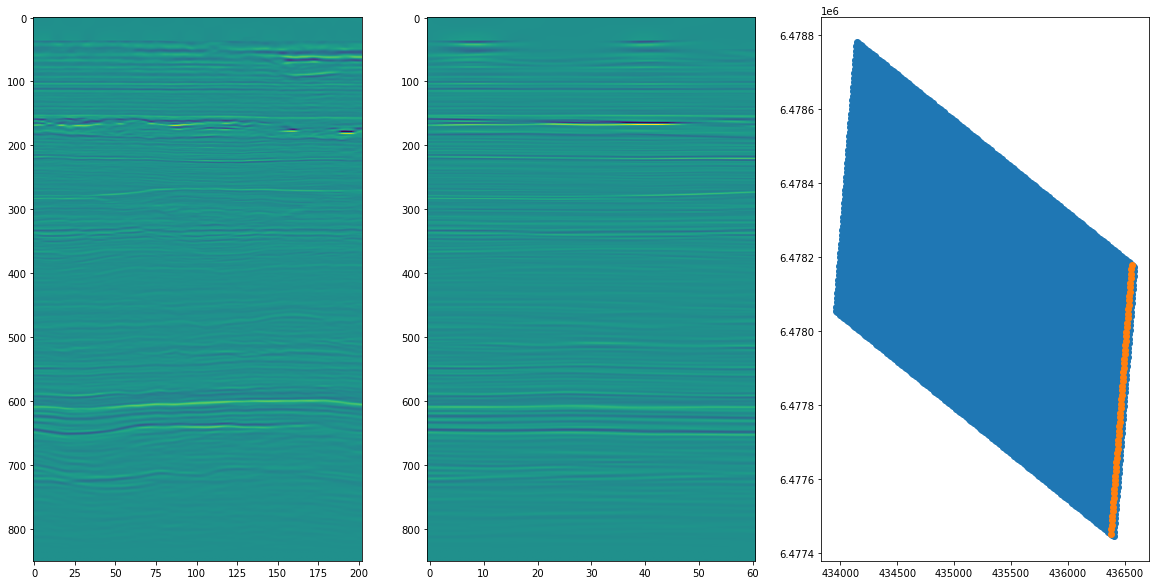

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

line1 = v10_full.sel(iline=10093)
line2 = v10_full.sel(xline=2152)

axs[0].imshow(line1.data.T, aspect='auto', vmin=-20, vmax=20)
axs[1].imshow(line2.data.T, aspect='auto', vmin=-20, vmax=20)
axs[2].scatter(v10_full.cdp_x.values.ravel(), v10_full.cdp_y.values.ravel())
axs[2].scatter(line2.cdp_x, line2.cdp_y)

In [23]:
v10_full_g = segy_loader('segysak-volve/volve10r12-twt-ang-sub.sgy', iline=189, xline=193, offset=37, vert_domain='DEPTH')


Fast direction is CROSSLINE_3D


In [29]:
v10_full_g

<xarray.Dataset>
Dimensions:  (depth: 850, iline: 31, offset: 3, xline: 101)
Coordinates:
  * iline    (iline) int32 10090 10092 10094 10096 ... 10144 10146 10148 10150
  * xline    (xline) int32 2150 2152 2154 2156 2158 ... 2342 2344 2346 2348 2350
  * depth    (depth) int32 4 8 12 16 20 24 28 ... 3380 3384 3388 3392 3396 3400
  * offset   (offset) int32 10 25 37
    cdp_x    (iline, xline, offset) float64 4.364e+05 4.364e+05 ... 4.342e+05
    cdp_y    (iline, xline, offset) float64 6.477e+06 6.477e+06 ... 6.479e+06
Data variables:
    data     (iline, xline, depth, offset) float64 0.01149 -0.00543 ... 0.0 0.0
Attributes:
    ns:                None
    ds:                None
    text:              C01 CLIENT : STATOIL                              PROC...
    d3_units:          None
    d3_domain:         None
    epsg:              None
    corner_points:     None
    corner_points_xy:  None
    source_file:       None
    srd:               None
    datatype:          None

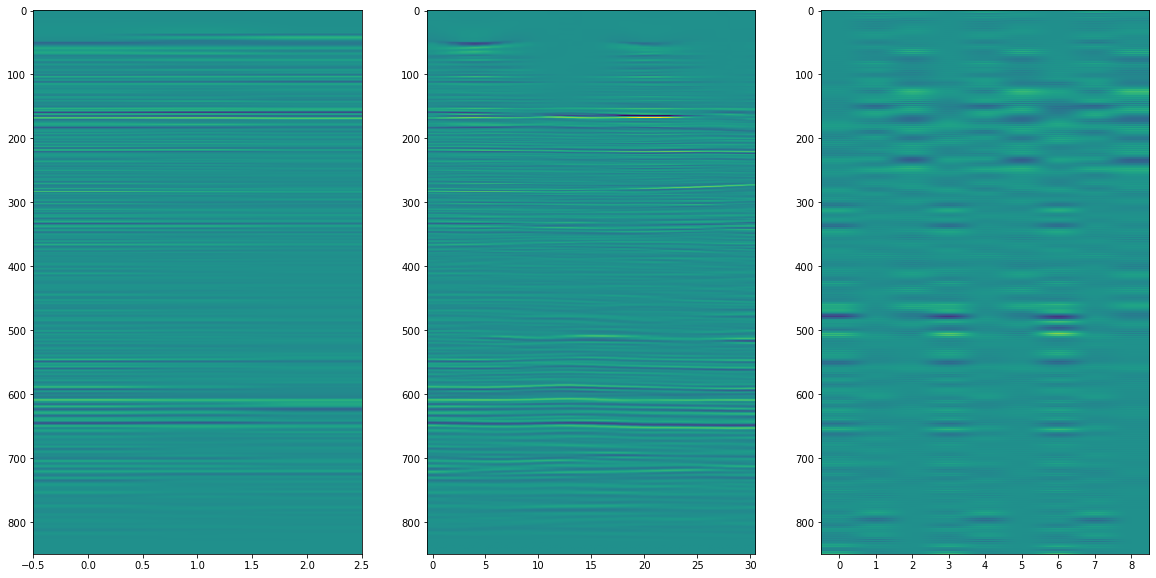

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# iline selection and xline selection (1 gather)
line1 = v10_full_g.sel(iline=10094, xline=2152)
# xline select and filter offset
line2 = v10_full_g.sel(xline=2152, offset=10)
# subselection
line3 = v10_full_g.sel(xline=2152).where(v10_full_g.iline < 10096, drop=True).data.values.reshape((-1, 850))

axs[0].imshow(line1.data, aspect='auto', vmin=-20, vmax=20)
axs[1].imshow(line2.data.T, aspect='auto', vmin=-20, vmax=20)
axs[2].imshow(line3.T, aspect='auto', vmin=-20, vmax=20)